In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [54]:
result0 = pd.read_csv('./kuma/out/kuma_out_narrow.csv')
result1 = pd.read_csv('./kuma/out/kuma_out_wide.csv')

In [53]:
result2

,Unnamed: 0,evaluation0,evaluation1,file name,gini0,gini1,measurement0,measurement1
0,0,0.994474,9.735016,00.tif,0.088442,0.092836,2.971160,2.717685
1,1,12.529656,12.639875,01.jpg,0.064122,0.067349,2.636640,2.633444
2,2,11.524466,4.761288,02.jpg,0.075796,0.074833,2.665790,2.861923
3,3,0.000000,12.146405,03.jpg,0.065718,0.088314,3.029403,2.647754
4,4,28.360213,37.013012,04.jpg,0.059073,0.066816,2.177554,1.926623
5,5,48.092126,46.322756,05.jpg,0.067722,0.078700,1.605328,1.656640
6,6,30.787156,44.041790,06.jpg,0.056014,0.056702,2.107172,1.722788
7,7,3.412274,0.000000,07.jpg,0.080125,0.082464,2.901044,3.118797
8,8,0.000000,0.000000,08.JPG,0.120505,0.127522,3.841422,5.200113
9,9,0.000000,0.000000,09.JPG,0.108643,0.113051,6.065413,6.341803


In [4]:
result1

,Unnamed: 0,evaluation0,evaluation1,file name,measurement0,measurement1
0,0,0.994474,9.735016,00.tif,2.971160,2.717685
1,1,12.529656,12.639875,01.jpg,2.636640,2.633444
2,2,11.524466,4.761288,02.jpg,2.665790,2.861923
3,3,0.000000,12.146405,03.jpg,3.029403,2.647754
4,4,28.360213,37.013012,04.jpg,2.177554,1.926623
5,5,48.092126,46.322756,05.jpg,1.605328,1.656640
6,6,30.787156,44.041790,06.jpg,2.107172,1.722788
7,7,3.412274,0.000000,07.jpg,2.901044,3.118797
8,8,0.000000,0.000000,08.JPG,3.841422,5.200113
9,9,0.000000,0.000000,09.JPG,6.065413,6.341803


In [5]:
result = pd.merge(result0, result1, on='file name')[['file name', 'measurement0_x', 'measurement0_y', 'measurement1_x', 'measurement1_y']]

In [6]:
result

,file name,measurement0_x,measurement0_y,measurement1_x,measurement1_y
0,00.tif,2.565217,2.971160,2.526754,2.717685
1,01.jpg,2.075410,2.636640,2.260536,2.633444
2,02.jpg,2.496722,2.665790,2.852481,2.861923
3,03.jpg,2.399201,3.029403,2.252891,2.647754
4,04.jpg,3.097427,2.177554,2.365052,1.926623
5,05.jpg,2.825769,1.605328,1.914552,1.656640
6,06.jpg,1.816234,2.107172,1.506325,1.722788
7,07.jpg,2.126743,2.901044,2.481941,3.118797
8,08.JPG,3.394083,3.841422,3.445631,5.200113
9,09.JPG,5.187108,6.065413,4.637089,6.341803


In [7]:
rank = pd.read_csv('./kuma/rank.csv', header=None, names=( "file name index", "rank"))

In [8]:
data = pd.concat([result, rank['rank']], axis=1, join='inner')

In [9]:
data

,file name,measurement0_x,measurement0_y,measurement1_x,measurement1_y,rank
0,00.tif,2.565217,2.971160,2.526754,2.717685,2
1,01.jpg,2.075410,2.636640,2.260536,2.633444,2
2,02.jpg,2.496722,2.665790,2.852481,2.861923,2
3,03.jpg,2.399201,3.029403,2.252891,2.647754,3
4,04.jpg,3.097427,2.177554,2.365052,1.926623,4
5,05.jpg,2.825769,1.605328,1.914552,1.656640,5
6,06.jpg,1.816234,2.107172,1.506325,1.722788,3
7,07.jpg,2.126743,2.901044,2.481941,3.118797,2
8,08.JPG,3.394083,3.841422,3.445631,5.200113,1
9,09.JPG,5.187108,6.065413,4.637089,6.341803,1


In [10]:
data['measurement_mean_x'] = (data['measurement0_x'] + data['measurement1_x']) / 2
data['measurement_mean_y'] = (data['measurement0_y'] + data['measurement1_y']) / 2
data_mean = data[['file name', 'rank', 'measurement_mean_x', 'measurement_mean_y']]
data_mean

,file name,rank,measurement_mean_x,measurement_mean_y
0,00.tif,2,2.545986,2.844422
1,01.jpg,2,2.167973,2.635042
2,02.jpg,2,2.674601,2.763857
3,03.jpg,3,2.326046,2.838579
4,04.jpg,4,2.731239,2.052088
5,05.jpg,5,2.370160,1.630984
6,06.jpg,3,1.661279,1.914980
7,07.jpg,2,2.304342,3.009921
8,08.JPG,1,3.419857,4.520767
9,09.JPG,1,4.912098,6.203608


In [11]:
data_mean['measurement_norm_x'] = (data['measurement_mean_x'] -data['measurement_mean_x'].mean())/data['measurement_mean_x'].std()
data_mean['measurement_norm_y'] = (data['measurement_mean_y'] -data['measurement_mean_y'].mean())/data['measurement_mean_y'].std()

/home/CORPUSERS/86002444/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/CORPUSERS/86002444/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
data_mean

,file name,rank,measurement_mean_x,measurement_mean_y,measurement_norm_x,measurement_norm_y
0,00.tif,2,2.545986,2.844422,-0.184856,-0.144415
1,01.jpg,2,2.167973,2.635042,-0.607405,-0.297903
2,02.jpg,2,2.674601,2.763857,-0.041088,-0.203474
3,03.jpg,3,2.326046,2.838579,-0.430709,-0.148698
4,04.jpg,4,2.731239,2.052088,0.022223,-0.725243
5,05.jpg,5,2.370160,1.630984,-0.381397,-1.033938
6,06.jpg,3,1.661279,1.914980,-1.173796,-0.825752
7,07.jpg,2,2.304342,3.009921,-0.454969,-0.023094
8,08.JPG,1,3.419857,4.520767,0.791972,1.084447
9,09.JPG,1,4.912098,6.203608,2.460024,2.318071


In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


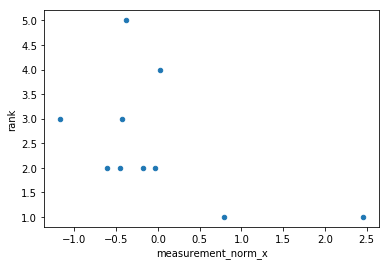

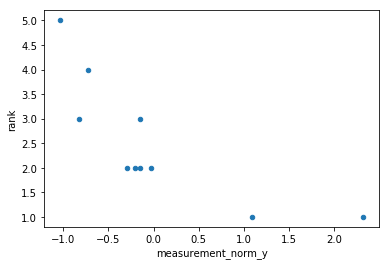

In [14]:
data_mean[['rank', 'measurement_norm_x']].plot(y='rank', x='measurement_norm_x', kind='scatter')
data_mean[['rank', 'measurement_norm_y']].plot(y='rank', x='measurement_norm_y', kind='scatter')

In [15]:
data_mean[['rank', 'measurement_norm_x']].corr()

,rank,measurement_norm_x
rank,1.000000,-0.521395
measurement_norm_x,-0.521395,1.000000


In [16]:
data_mean[['rank', 'measurement_norm_y']].corr()

,rank,measurement_norm_y
rank,1.000000,-0.781647
measurement_norm_y,-0.781647,1.000000


In [17]:
data_mean

,file name,rank,measurement_mean_x,measurement_mean_y,measurement_norm_x,measurement_norm_y
0,00.tif,2,2.545986,2.844422,-0.184856,-0.144415
1,01.jpg,2,2.167973,2.635042,-0.607405,-0.297903
2,02.jpg,2,2.674601,2.763857,-0.041088,-0.203474
3,03.jpg,3,2.326046,2.838579,-0.430709,-0.148698
4,04.jpg,4,2.731239,2.052088,0.022223,-0.725243
5,05.jpg,5,2.370160,1.630984,-0.381397,-1.033938
6,06.jpg,3,1.661279,1.914980,-1.173796,-0.825752
7,07.jpg,2,2.304342,3.009921,-0.454969,-0.023094
8,08.JPG,1,3.419857,4.520767,0.791972,1.084447
9,09.JPG,1,4.912098,6.203608,2.460024,2.318071


In [19]:
%ls

DetectDarkUnderEye.py*          iPhone_demosic/
DetectDarkUnderEye.pyc          image_histogram.ipynb
DetectDarkUnderEyeDev.py*       img_cheek0_1.png*
DetectDarkUnderEyeDev.pyc       img_cheek0_3.png
DetectROI.py*                   img_detect_underEye.png*
DetectROI.pyc                   img_gini.csv
FaceKeyPoint.py                 img_underEye0.png*
FaceKeyPoint.pyc                img_underEye1.png*
FaceNormalization.py            img_wb_0.png*
FaceNormalization.pyc           img_wb_1.png*
FacePoseEstimation.py*          img_wb_EV00_T.png
FacePoseEstimation.pyc          img_wb_EV05_T.png
Homology_Translation.py         jupyter/
Homology_Translation.pyc        kuma/
Lorentz_Gini_Kuma.ipynb         kuma_evaluation.ipynb
Lorentz_curve_Gini-Copy2.ipynb  libSkinAnalysis.py*
Lorentz_curve_Gini.ipynb        libSkinAnalysis.pyc
SampleSkinAnalysisClass.py*     main.py*
SampleSkinAnalysisClass.pyc     out/
SampleSkinAnalysis_script.py*   practice.csv
config.py*                      screen.csv


In [30]:
gini = pd.read_csv('./img_gini.csv', header=None, names=['id', 'gini'])
gini.set_index('id')

,gini
id,
0,0.088442
1,0.064122
2,0.075796
3,0.065718
4,0.059073
5,0.067723
6,0.056014
7,0.080125
8,0.120505


In [31]:
data_mean

,file name,rank,measurement_mean_x,measurement_mean_y,measurement_norm_x,measurement_norm_y
0,00.tif,2,2.545986,2.844422,-0.184856,-0.144415
1,01.jpg,2,2.167973,2.635042,-0.607405,-0.297903
2,02.jpg,2,2.674601,2.763857,-0.041088,-0.203474
3,03.jpg,3,2.326046,2.838579,-0.430709,-0.148698
4,04.jpg,4,2.731239,2.052088,0.022223,-0.725243
5,05.jpg,5,2.370160,1.630984,-0.381397,-1.033938
6,06.jpg,3,1.661279,1.914980,-1.173796,-0.825752
7,07.jpg,2,2.304342,3.009921,-0.454969,-0.023094
8,08.JPG,1,3.419857,4.520767,0.791972,1.084447
9,09.JPG,1,4.912098,6.203608,2.460024,2.318071


In [43]:
data_mean.loc[:,'gini'] = gini['gini']

/home/CORPUSERS/86002444/.conda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
data_mean

,file name,rank,measurement_mean_x,measurement_mean_y,measurement_norm_x,measurement_norm_y,gini
0,00.tif,2,2.545986,2.844422,-0.184856,-0.144415,0.088442
1,01.jpg,2,2.167973,2.635042,-0.607405,-0.297903,0.064122
2,02.jpg,2,2.674601,2.763857,-0.041088,-0.203474,0.075796
3,03.jpg,3,2.326046,2.838579,-0.430709,-0.148698,0.065718
4,04.jpg,4,2.731239,2.052088,0.022223,-0.725243,0.059073
5,05.jpg,5,2.370160,1.630984,-0.381397,-1.033938,0.067723
6,06.jpg,3,1.661279,1.914980,-1.173796,-0.825752,0.056014
7,07.jpg,2,2.304342,3.009921,-0.454969,-0.023094,0.080125
8,08.JPG,1,3.419857,4.520767,0.791972,1.084447,0.120505
9,09.JPG,1,4.912098,6.203608,2.460024,2.318071,0.108644


In [45]:
data_mean[['rank', 'measurement_norm_y']].corr()

,rank,measurement_norm_y
rank,1.000000,-0.781647
measurement_norm_y,-0.781647,1.000000


In [46]:
data_mean[['rank', 'gini']].corr()

,rank,gini
rank,1.000000,-0.730362
gini,-0.730362,1.000000


In [47]:
data_mean[['gini', 'measurement_norm_y']].corr()

,gini,measurement_norm_y
gini,1.000000,0.851016
measurement_norm_y,0.851016,1.000000


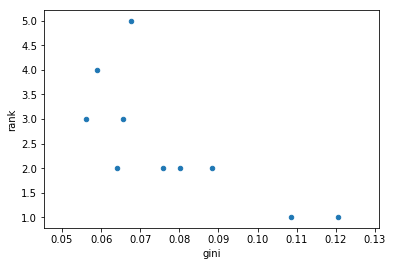

In [50]:
data_mean[['rank', 'gini']].plot(y='rank', x='gini', kind='scatter')

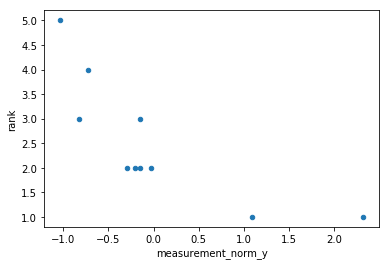

In [51]:
data_mean[['rank', 'measurement_norm_y']].plot(y='rank', x='measurement_norm_y', kind='scatter')